TP Grupal

2024

Matias Alevi,
Antonella Robiolio,
Alexey Marassi,
Agostina Leonard

In [2]:
!pip install kagglehub

In [ ]:
# se carga el kaggle api con el token personal
# se genera en la pagina web de kaggle > ajustes de cuenta > API > Generate New Token

# subir el archivo kaggle.json a colab

from google.colab import files
files.upload()

In [4]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
# se descarga el dataset de la pagina web de kaggle
!kaggle datasets download -d ziya07/student-health-data

Dataset URL: https://www.kaggle.com/datasets/ziya07/student-health-data
License(s): CC0-1.0
  0% 0.00/70.8k [00:00<?, ?B/s]
100% 70.8k/70.8k [00:00<00:00, 43.6MB/s]


In [6]:
# descomprime el archivo zip
!unzip student-health-data.zip -d student-health-data

Archive:  student-health-data.zip
  inflating: student-health-data/student_health_data.csv  


In [7]:
data = pd.read_csv('student-health-data/student_health_data.csv')

In [8]:
# pandas
data.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate


In [9]:
tamanio= data.shape
print(tamanio)

(1000, 14)


In [10]:
matriz = data['Health_Risk_Level'].value_counts()
matriz_df = matriz.rename_axis('Health_Risk_Level').reset_index(name='Count')
matriz_pivot = data.pivot_table(index='Health_Risk_Level', aggfunc='size')
print(matriz_pivot)

Health_Risk_Level
High        138
Low         190
Moderate    672
dtype: int64


In [11]:
matriz_actividad = data['Physical_Activity'].value_counts()
matriz_actividad_df = matriz_actividad.rename_axis('Physical_Activity').reset_index(name='Count')
matriz_pivot = data.pivot_table(index='Physical_Activity', aggfunc='size')
print(matriz_pivot)

Physical_Activity
High        207
Low         302
Moderate    491
dtype: int64


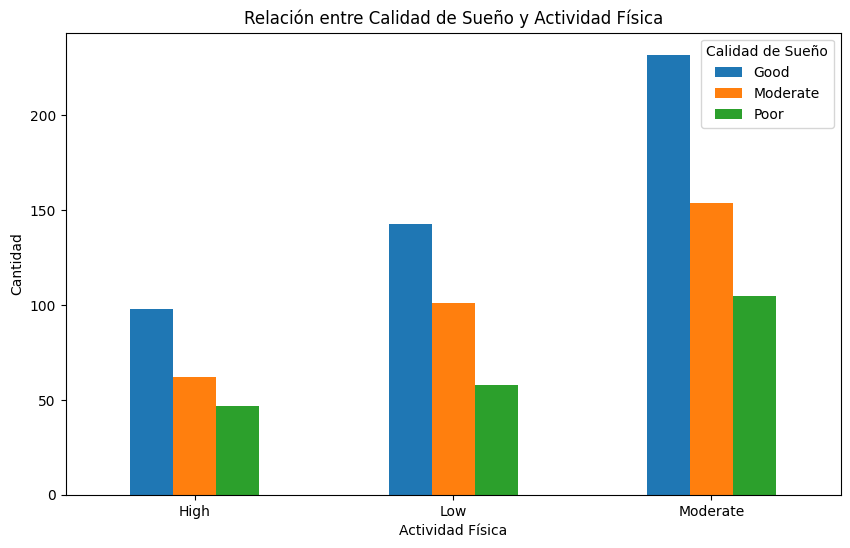

In [12]:
# matplotlib y seaborn

tabla = data.groupby(['Physical_Activity', 'Sleep_Quality']).size().unstack()

tabla.plot(kind='bar', figsize=(10, 6))
plt.title('Relación entre Calidad de Sueño y Actividad Física')
plt.xlabel('Actividad Física')
plt.ylabel('Cantidad')
plt.legend(title='Calidad de Sueño')
plt.xticks(rotation=0)
plt.show()

In [13]:
actividad_por_edad = data.groupby(['Age', 'Physical_Activity']).size().unstack()
print(actividad_por_edad)

Physical_Activity  High  Low  Moderate
Age                                   
18                   31   50        75
19                   25   49        63
20                   22   43        65
21                   31   52        73
22                   33   34        81
23                   30   36        69
24                   35   38        65


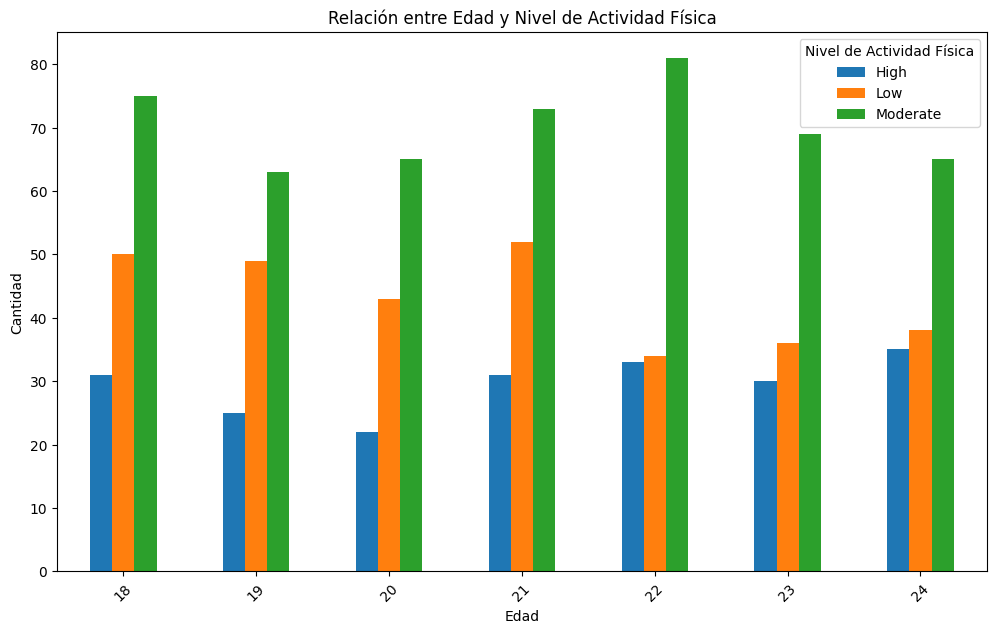

In [14]:
# grafcio de barras para varias edad agrupados
actividad_por_edad.plot(kind='bar', figsize=(12, 7))
plt.title('Relación entre Edad y Nivel de Actividad Física')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.legend(title='Nivel de Actividad Física')
plt.xticks(rotation=45)
plt.show()

In [15]:
promedio_por_edad = data.groupby('Age')['Heart_Rate'].mean().reset_index() #reset_index se utiliza para restaurar el indice del dataframe a un indice tipo int, asi el resultado es un dataframe normal y no un objeto de tipo groupby
print(round(promedio_por_edad,2))

   Age  Heart_Rate
0   18       69.58
1   19       69.79
2   20       69.46
3   21       70.62
4   22       71.50
5   23       69.98
6   24       69.64


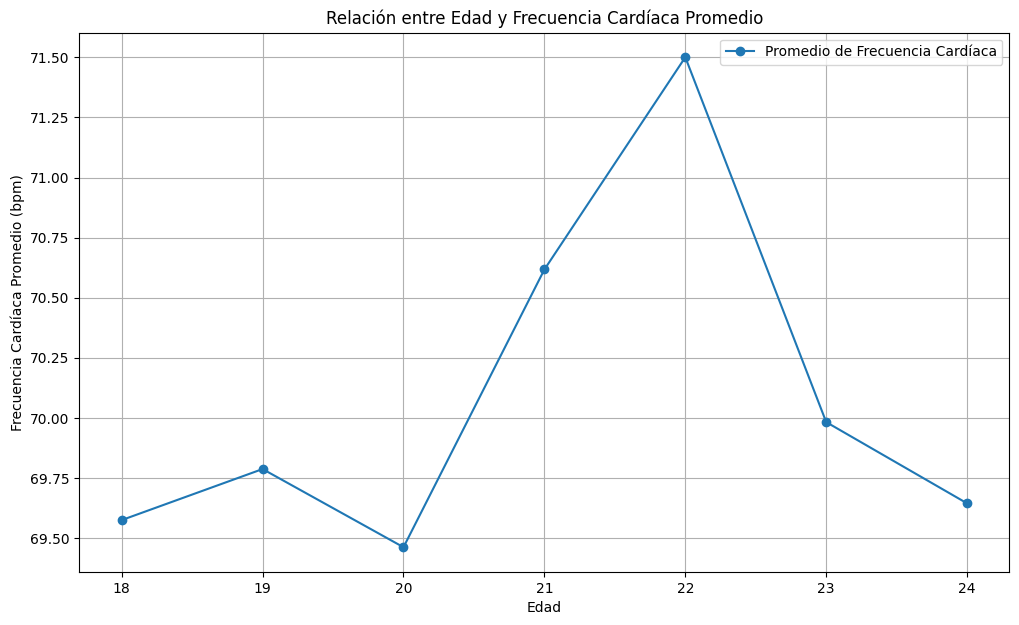

In [16]:
plt.figure(figsize=(12, 7))
plt.plot(promedio_por_edad['Age'], promedio_por_edad['Heart_Rate'], marker='o', linestyle='-', label='Promedio de Frecuencia Cardíaca')
plt.title('Relación entre Edad y Frecuencia Cardíaca Promedio')
plt.xlabel('Edad')
plt.ylabel('Frecuencia Cardíaca Promedio (bpm)')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
# plotly.expres para visualizaciones interactivas

fig = px.box(data,
             x='Physical_Activity',
             y='Heart_Rate',
             color='Physical_Activity',
             title='Relación entre Frecuencia Cardíaca y Nivel de Actividad Física',
             labels={'Physical_Activity': 'Nivel de Actividad Física', 'Heart_Rate': 'Frecuencia Cardíaca (bpm)'},
             width=800,
             height=500)

fig.show()

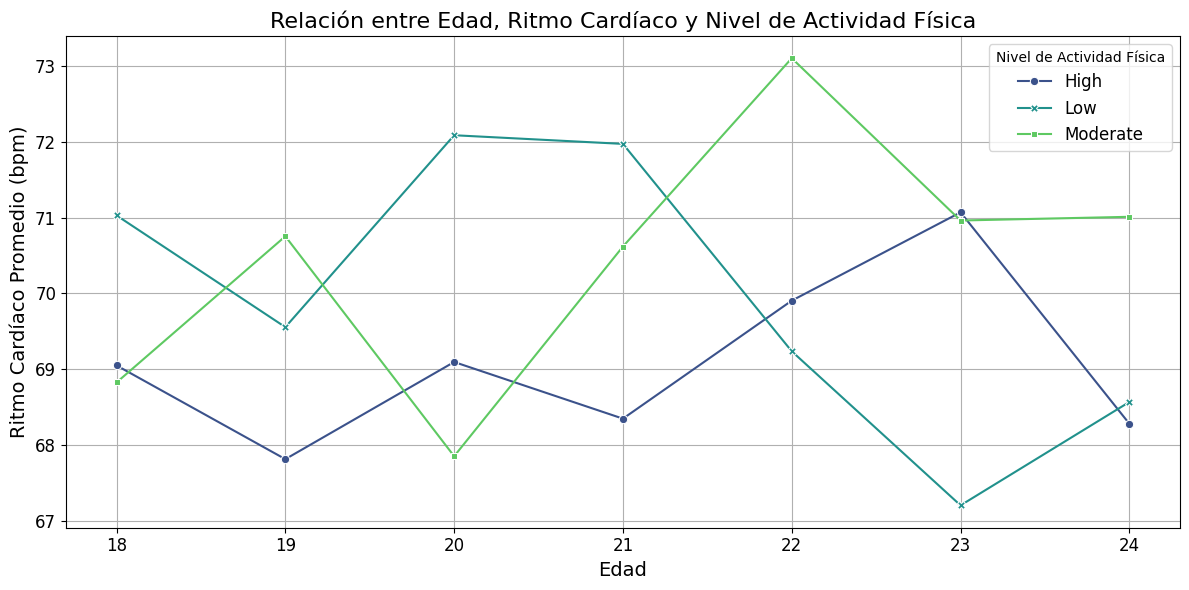

In [18]:
# seaborn para visualizar datos, parecido a matplotlib pero mas avanzado
promedio_por_edad_actividad = data.groupby(['Age', 'Physical_Activity'])['Heart_Rate'].mean().reset_index()

# grafico de lineas
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=promedio_por_edad_actividad,
    x='Age',
    y='Heart_Rate',
    hue='Physical_Activity',
    style='Physical_Activity',
    markers=True,
    dashes=False,
    palette='viridis'
)

plt.title('Relación entre Edad, Ritmo Cardíaco y Nivel de Actividad Física', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Ritmo Cardíaco Promedio (bpm)', fontsize=14)
plt.grid(True)
plt.legend(title='Nivel de Actividad Física', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

In [19]:
# Agrupar por género y nivel de actividad física, y contar ocurrencias
actividad_por_genero = data.groupby(['Gender', 'Physical_Activity']).size().unstack()

# Mostrar los resultados
print("Cantidad de individuos por género y nivel de actividad física:")
print(actividad_por_genero)

Cantidad de individuos por género y nivel de actividad física:
Physical_Activity  High  Low  Moderate
Gender                                
F                    97  129       255
M                   110  173       236


In [20]:
# Calcular el promedio de ritmo cardíaco por género
ritmo_cardiaco_por_genero = data.groupby('Gender')['Heart_Rate'].mean()

# Mostrar los resultados
print("Promedio de ritmo cardíaco por género:")
print(ritmo_cardiaco_por_genero)

Promedio de ritmo cardíaco por género:
Gender
F    69.755754
M    70.422631
Name: Heart_Rate, dtype: float64


- La mayoría de las personas con calidad de sueño “Good” tienen un nivel de actividad física Moderate.
- Las personas con calidad de sueño “Poor” están más presentes en los niveles Moderate y Low, mientras que son menos comunes en High.
- El nivel de actividad física Moderate es el más común en todos los grupos de edad.
- El nivel de actividad física High es el menos frecuente en todos los rangos de edad.
- La frecuencia cardíaca promedio oscila entre 69.46 bpm (20 años) y 71.50 bpm (22 años).
- Las personas con nivel de actividad física High tienen una frecuencia cardíaca promedio más baja y una menor dispersión.
- Los niveles Moderate y Low presentan una frecuencia cardíaca promedio más alta, con valores más dispersos.
- Las mujeres (F) tienen una mayor representación en niveles de actividad física Moderate (255) y Low (129).
- Los hombres (M) son más comunes en niveles de actividad física High (110).
- Promedio de Mujeres (F): 69.76 bpm.
- Promedio de Hombres (M): 70.42 bpm.
- Los hombres tienen un promedio ligeramente más alto de frecuencia cardíaca que las mujeres.